In [ ]:
!pip install tensorflow matplotlib numpy opencv-python



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fresh and rotten.zip to fresh and rotten.zip


In [ ]:
import zipfile

with zipfile.ZipFile("fresh and rotten.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1/255)

train_data = train_datagen.flow_from_directory(
    '/content/dataset/FRUIT-16K/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    '/content/dataset/FRUIT-16K/test',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 11200 images belonging to 16 classes.
Found 4800 images belonging to 16 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(16, activation='softmax') # Changed from 2 to 16 to match the number of classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         2,064 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,416 (18.43 MB)

 Trainable params: 4,830,416 (18.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=3
)


350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3080 - loss: 2.0779

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


350/350 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.3084 - loss: 2.0766 - val_accuracy: 0.3954 - val_loss: 2.0177
Epoch 2/3
350/350 ━━━━━━━━━━━━━━━━━━━━ 634s 2s/step - accuracy: 0.7201 - loss: 0.8315 - val_accuracy: 0.4435 - val_loss: 2.0136
Epoch 3/3
350/350 ━━━━━━━━━━━━━━━━━━━━ 635s 2s/step - accuracy: 0.8111 - loss: 0.5524 - val_accuracy: 0.4994 - val_loss: 2.0172


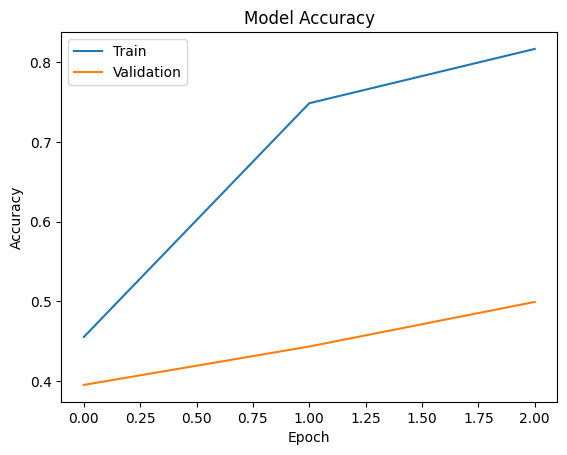

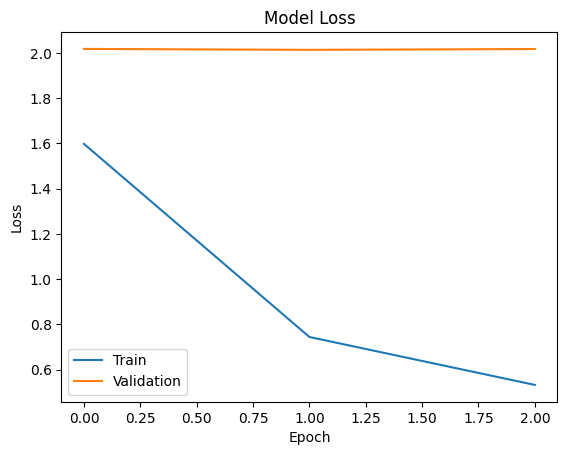

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


In [ ]:
model.save("fruits_cnn.h5")


In [ ]:
from google.colab import files
files.download("fruits_cnn.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving 709.jpg to 709.jpg


In [ ]:
import cv2

img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (150,150))
img_array = img_resized / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)[0]

# Get class names in the correct order from the ImageDataGenerator
class_indices = train_data.class_indices
labels = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]

print(f"Prediction: {labels[np.argmax(prediction)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediction: F_Orange
